In [41]:
import pandas as pd


import gensim

from gensim.models import CoherenceModel

from sklearn.model_selection import train_test_split


from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df = pd.read_parquet('clean_v1.parquet')
df.head()

Title  \
0                      find malloc double free error   
1                 mock asp.netmvc controller context   
2                                  list symbols file   
3  main performance differences varchar nvarchar ...   
4                            highpass lowpass filter   

                                                Body      Id  \
0  program application objectivec get error myapp...  971249   
1  controller context depend asp.net internals wa...   32640   
2  list symbols export file possible would also l...   34732   
3  work database small web app school use sql ser...   35366   
4  graphics audio edit process software often con...   35530   

                                   Tags  Score  ViewCount  AnswerCount  \
0  iphone objective-c memory-management     82      79057           13   
1      asp.net-mvc unit-testing mocking     70      48431            7   
2                             c++ c gcc    594     512500           11   
3            sql-server sql-server-2005    247     182380           14   
4                       algorithm audio     27      85513            6   

   FavoriteCount                                    Title_not_clean  \
0            0.0  how to find the cause of a malloc "double free...   
1            0.0             mocking asp.net-mvc controller context   
2            0.0            how do i list the symbols in a .so file   
3            0.0  what are the main performance differences betw...   
4            0.0           what are high-pass and low-pass filters?   

                                      Body_not_clean  
0  i'm programming an application in objective-c ...  
1  so the controller context depends on some asp....  
2  how do i list the symbols being exported from ...  
3  i'm working on a database for a small web app ...  
4  graphics and audio editing and processing soft...

In [43]:
X_train, X_test = train_test_split(
    df['Title'] , test_size=0.25, random_state=42 # + " " + df["Body"]
)
X_train.shape

(47001,)

In [88]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [45]:
processed_docs = [doc.split() for doc in X_train]
len(processed_docs)

47001

In [89]:
test_processed_docs = [doc.split() for doc in X_test]

In [46]:
processed_docs[0]

['programmatic',
 'solution',
 'change',
 'navigation',
 'id',
 'highlight',
 'current',
 'page',
 'asp.net']

In [47]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [48]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=1000)

In [95]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [90]:
test_corpus = [dictionary.doc2bow(doc) for doc in test_processed_docs]

In [50]:
NUM_TOPIC = 50

In [51]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = NUM_TOPIC, id2word = dictionary, passes = 50, minimum_probability=0,random_state=100,
                                       chunksize=100,
                                       # alpha='auto',
                                       # per_word_topics=True
                                       )#, passes = 100)

In [52]:
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus)) # a measure of how good the model is. lower the better.


Perplexity:  -7.366053570845356


In [53]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary)
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.5275416869583426


In [63]:
# all_topics = lda_model.get_document_topics(bow_corpus, minimum_probability=0.0)
# all_topics_csr = gensim.matutils.corpus2csc(all_topics)
# all_topics_numpy = all_topics_csr.T.toarray()
# all_topics_df = pd.DataFrame(all_topics_numpy)
# all_topics_df.idxmax(axis=1)

0        40
1        13
2        48
3        21
4        46
         ..
46996    22
46997     8
46998     0
46999    12
47000    23
Length: 47001, dtype: int64

In [55]:
# all_topics = lda_model.get_document_topics(bow_corpus, per_word_topics=True)
#
# for doc_topics, word_topics, phi_values in all_topics:
#     print('New Document \n')
#     print('Document topics:', doc_topics)
#     print('Word topics:', word_topics)
#     print('Phi values:', phi_values)
#     print(" ")
#     print('-------------- \n')
#     break

In [56]:
lda_model.get_term_topics('c#')

[(10, 0.3266027)]

In [57]:
topics = []
for idx, topic in lda_model.print_topics(-1) :
    print(f"Topic: {idx} -> Words: {topic}")
    topics.append(topic)

Topic: 0 -> Words: 0.223*"key" + 0.118*"send" + 0.110*"message" + 0.060*"oracle" + 0.056*"long" + 0.044*"numpy" + 0.044*"hibernate" + 0.042*"retrieve" + 0.036*"body" + 0.029*"comparison"
Topic: 1 -> Words: 0.191*"change" + 0.095*"request" + 0.078*"row" + 0.077*"button" + 0.066*"color" + 0.059*"background" + 0.042*"order" + 0.035*"bar" + 0.033*"item" + 0.032*"ajax"
Topic: 2 -> Words: 0.197*".net" + 0.121*"control" + 0.103*"handle" + 0.063*"address" + 0.063*"scroll" + 0.052*"push" + 0.034*"argument" + 0.033*"launch" + 0.031*"notification" + 0.029*"place"
Topic: 3 -> Words: 0.250*"add" + 0.092*"generate" + 0.083*"exist" + 0.070*"delete" + 0.060*"hide" + 0.045*"statement" + 0.044*"post" + 0.041*"case" + 0.040*"parse" + 0.038*"try"
Topic: 4 -> Words: 0.178*"html" + 0.176*"custom" + 0.106*"form" + 0.090*"content" + 0.084*"attribute" + 0.079*"bootstrap" + 0.046*"language" + 0.042*"validation" + 0.034*"menu" + 0.033*"token"
Topic: 5 -> Words: 0.289*"jquery" + 0.185*"program" + 0.153*"map" + 0.

In [58]:
word_model = []
for i in range(len(topics)):
    str = topics[i].split(' + ')
    topic_model = []
    for j in range(10):
        weight = str[j][0:5]
        topic_model.append(float(weight))
    word_model.append(topic_model)
df_word_model = pd.DataFrame(word_model)
df_word_model.rename(index = {i: f"{i}" for i  in range(NUM_TOPIC)})

0      1      2      3      4      5      6      7      8      9
0   0.223  0.118  0.110  0.060  0.056  0.044  0.044  0.042  0.036  0.029
1   0.191  0.095  0.078  0.077  0.066  0.059  0.042  0.035  0.033  0.032
2   0.197  0.121  0.103  0.063  0.063  0.052  0.034  0.033  0.031  0.029
3   0.250  0.092  0.083  0.070  0.060  0.045  0.044  0.041  0.040  0.038
4   0.178  0.176  0.106  0.090  0.084  0.079  0.046  0.042  0.034  0.033
5   0.289  0.185  0.153  0.138  0.042  0.035  0.033  0.027  0.023  0.022
6   0.215  0.102  0.077  0.074  0.061  0.061  0.059  0.043  0.041  0.041
7   0.281  0.186  0.160  0.096  0.030  0.029  0.027  0.021  0.021  0.020
8   0.178  0.120  0.102  0.073  0.056  0.043  0.042  0.039  0.036  0.036
9   0.249  0.219  0.072  0.053  0.036  0.028  0.027  0.023  0.022  0.022
10  0.327  0.124  0.114  0.070  0.070  0.056  0.042  0.031  0.027  0.024
11  0.178  0.086  0.076  0.076  0.051  0.050  0.050  0.040  0.039  0.036
12  0.148  0.136  0.122  0.072  0.061  0.056  0.039  0.032  0.032  0.032
13  0.189  0.152  0.148  0.053  0.042  0.041  0.041  0.037  0.036  0.036
14  0.152  0.131  0.119  0.088  0.085  0.050  0.033  0.024  0.021  0.021
15  0.280  0.152  0.120  0.094  0.091  0.032  0.027  0.024  0.023  0.021
16  0.185  0.135  0.075  0.065  0.063  0.061  0.053  0.047  0.040  0.037
17  0.155  0.119  0.099  0.091  0.066  0.050  0.048  0.048  0.043  0.036
18  0.154  0.106  0.064  0.060  0.055  0.055  0.052  0.050  0.044  0.043
19  0.137  0.098  0.082  0.076  0.064  0.052  0.048  0.046  0.042  0.039
20  0.362  0.234  0.085  0.073  0.045  0.042  0.040  0.026  0.020  0.016
21  0.203  0.162  0.053  0.047  0.044  0.039  0.038  0.038  0.036  0.035
22  0.196  0.167  0.078  0.069  0.067  0.063  0.056  0.053  0.032  0.028
23  0.197  0.156  0.152  0.129  0.094  0.074  0.046  0.030  0.025  0.018
24  0.251  0.164  0.103  0.061  0.055  0.045  0.044  0.038  0.029  0.026
25  0.193  0.092  0.069  0.058  0.055  0.051  0.049  0.047  0.046  0.039
26  0.118  0.113  0.084  0.061  0.060  0.050  0.046  0.043  0.042  0.039
27  0.253  0.223  0.094  0.063  0.046  0.046  0.039  0.039  0.037  0.036
28  0.183  0.123  0.115  0.089  0.087  0.072  0.040  0.040  0.037  0.032
29  0.334  0.115  0.079  0.077  0.053  0.040  0.034  0.030  0.027  0.026
30  0.190  0.136  0.079  0.070  0.058  0.048  0.046  0.034  0.033  0.029
31  0.187  0.100  0.061  0.059  0.059  0.057  0.056  0.055  0.046  0.042
32  0.241  0.108  0.070  0.070  0.068  0.065  0.058  0.051  0.028  0.027
33  0.204  0.144  0.121  0.084  0.073  0.056  0.034  0.029  0.026  0.025
34  0.156  0.133  0.106  0.101  0.083  0.066  0.034  0.032  0.031  0.030
35  0.290  0.283  0.061  0.057  0.046  0.041  0.036  0.030  0.028  0.025
36  0.245  0.174  0.097  0.075  0.068  0.058  0.039  0.034  0.034  0.027
37  0.111  0.095  0.084  0.081  0.076  0.075  0.073  0.061  0.049  0.048
38  0.183  0.140  0.096  0.092  0.085  0.070  0.055  0.047  0.046  0.038
39  0.196  0.122  0.116  0.067  0.053  0.051  0.044  0.043  0.032  0.030
40  0.116  0.061  0.059  0.058  0.056  0.054  0.049  0.047  0.040  0.039
41  0.118  0.109  0.103  0.084  0.072  0.059  0.051  0.045  0.035  0.033
42  0.182  0.169  0.099  0.074  0.063  0.063  0.060  0.055  0.050  0.040
43  0.212  0.101  0.081  0.072  0.059  0.049  0.045  0.043  0.032  0.030
44  0.220  0.082  0.078  0.053  0.053  0.050  0.048  0.044  0.043  0.042
45  0.175  0.150  0.088  0.074  0.052  0.046  0.035  0.033  0.030  0.028
46  0.199  0.176  0.158  0.081  0.047  0.040  0.039  0.034  0.030  0.028
47  0.366  0.091  0.077  0.075  0.067  0.057  0.033  0.027  0.020  0.018
48  0.185  0.123  0.105  0.088  0.042  0.040  0.034  0.033  0.032  0.032
49  0.433  0.117  0.089  0.058  0.049  0.042  0.040  0.034  0.022  0.021

In [66]:
from itertools import chain


# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic]
                      for topic in [doc for doc in lda_model[bow_corpus]]]))
threshold = sum(scores)/len(scores)
print (threshold)

0.019999999890764824


In [92]:
data_dict = {'Dominant_Topic':[], 'Perc_Contribution':[], 'topic_keywords':[]}

for i, row in enumerate(lda_model[test_corpus]):
    row = sorted(row, key=lambda x: x[1], reverse=True)
    #print(row)
    for j, (topic_num, prop_topic) in enumerate(row):
        wp = lda_model.show_topic(topic_num)
        # topic_keywords = ", ".join([str(prop) + word for word, prop in wp])
        topic_keywords = [(float(weight) , word) for word, weight in wp]
        # topic_keywords = [float(weight) for word, weight in wp]
        data_dict['Dominant_Topic'].append(int(topic_num))
        data_dict['Perc_Contribution'].append(round(prop_topic, 3))
        data_dict['topic_keywords'].append(topic_keywords)

        break

df_topics = pd.DataFrame(data_dict)

# df_topics['Tags'] = df['Tags']
df_topics['Title'] = X_test
df_topics

Dominant_Topic  Perc_Contribution  \
0                  36              0.289   
1                   3              0.340   
2                   0              0.340   
3                  13              0.404   
4                  23              0.337   
...               ...                ...   
15663              23              0.337   
15664               6              0.255   
15665              22              0.255   
15666              23              0.255   
15667              14              0.289   

                                          topic_keywords  \
0      [(0.24545077979564667, set), (0.17423616349697...   
1      [(0.2496379315853119, add), (0.092291861772537...   
2      [(0.2233743965625763, key), (0.117752879858016...   
3      [(0.188855841755867, studio), (0.1521542072296...   
4      [(0.19716903567314148, data), (0.1558021157979...   
...                                                  ...   
15663  [(0.19716903567314148, data), (0.1558021157979...   
15664  [(0.21523648500442505, c++), (0.10187359154224...   
15665  [(0.19595381617546082, framework), (0.16655796...   
15666  [(0.19716903567314148, data), (0.1558021157979...   
15667  [(0.15196797251701355, windows), (0.1310708075...   

                                                   Title  
0                force jupyter notebook open web browser  
1      djangooauthtoolkit customize authenticate resp...  
2                           detail appcrash message mean  
3                     way export shortcuts visual studio  
4            appfabric cache perform x slower sql server  
...                                                  ...  
15663                     sql query count multiple table  
15664                   close vselect click outside vapp  
15665              zend framework pdf multiline problems  
15666                                  use like join sql  
15667  squid forward another proxy authentication det...  

[15668 rows x 4 columns]


 [202.9657136771896, 211.2568304109051, 216.5824382629506, 231.55705298658546, 273.6361602353942, 337.34891137531577, 476.5754452614594, 945.9682923911301, 1688.9754388442416, 29383.308950448372, 550838.1797745225, 2.2705880667993887e+21, 1.5215951858942131e+32]


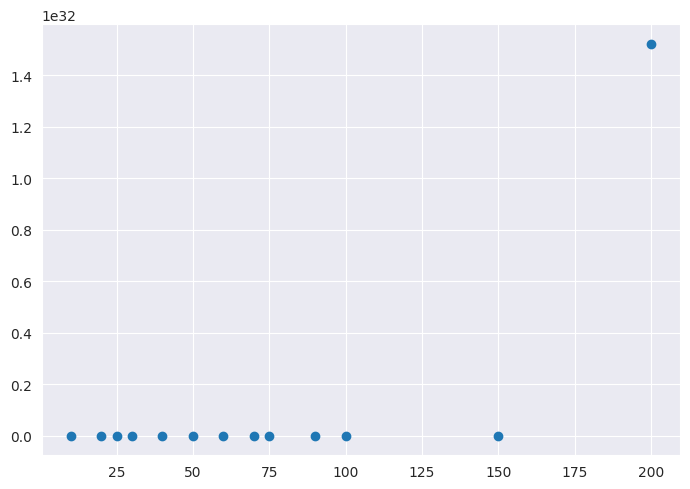

In [97]:
topic_range = [10, 20, 25, 30, 40, 50, 60, 70, 75, 90, 100, 150, 200]
def lda_function(X_train, X_test, dictionary, nr_topics):
    ldamodel2 = gensim.models.LdaModel(X_train,
                                       id2word=dictionary,
                                       num_topics=nr_topics,
                                       alpha='auto',
                                       eta=0.01,
                                       passes=10,
    iterations=500,
    random_state=42)
    return 2**(-1*ldamodel2.log_perplexity(X_test))

log_perplecs = [lda_function(bow_corpus, test_corpus, dictionary, nr_topics=topic) for topic in topic_range]

print("\n",log_perplecs)

fig1, ax1 = plt.subplots(figsize=(7,5))
ax1.scatter(x=topic_range, y=log_perplecs)
fig1.tight_layout()

In [60]:
data_dict = {'Dominant_Topic':[], 'Perc_Contribution':[], 'topic_keywords':[]}

for i, row in enumerate(lda_model[bow_corpus]):
    row = sorted(row, key=lambda x: x[1], reverse=True)
    #print(row)
    for j, (topic_num, prop_topic) in enumerate(row):
        wp = lda_model.show_topic(topic_num)
        # topic_keywords = ", ".join([str(prop) + word for word, prop in wp])
        topic_keywords = [(float(weight) , word) for word, weight in wp]
        # topic_keywords = [float(weight) for word, weight in wp]
        data_dict['Dominant_Topic'].append(int(topic_num))
        data_dict['Perc_Contribution'].append(round(prop_topic, 3))
        data_dict['topic_keywords'].append(topic_keywords)

        break

df_topics = pd.DataFrame(data_dict)

# df_topics['Tags'] = df['Tags']
df_topics['Title'] = X_train
df_topics

Dominant_Topic  Perc_Contribution  \
0                  40              0.224   
1                  13              0.289   
2                  48              0.340   
3                  21              0.224   
4                  46              0.510   
...               ...                ...   
46996              22              0.255   
46997               8              0.673   
46998               0              0.020   
46999              12              0.204   
47000              23              0.170   

                                          topic_keywords  \
0      [(0.11633699387311935, div), (0.06074415892362...   
1      [(0.188855841755867, studio), (0.1521542072296...   
2      [(0.18502363562583923, image), (0.122829392552...   
3      [(0.2026529461145401, object), (0.162418544292...   
4      [(0.1985854208469391, list), (0.17614910006523...   
...                                                  ...   
46996  [(0.19595381617546082, framework), (0.16655796...   
46997  [(0.17789752781391144, find), (0.1202745512127...   
46998  [(0.2233743965625763, key), (0.117752879858016...   
46999  [(0.14800016582012177, wpf), (0.13613662123680...   
47000  [(0.19716903567314148, data), (0.1558021157979...   

                                                   Title  
0      programmatic solution change navigation id hig...  
1            embed font c# application use visual studio  
2                calculate systemdecimal precision scale  
3      iso c++ forbid forward reference enum type spe...  
4             extend indexcontroller basecontroller zend  
...                                                  ...  
46996                       case choose katalon selenium  
46997  lubridate week find consecutive week number mu...  
46998                              explanation blob clob  
46999                     character need escape use bash  
47000  problems generate sql via eclipselink miss sep...  

[47001 rows x 4 columns]

In [62]:

t = df_topics['topic_keywords'][2]
my_new_list = [i * df_topics['Perc_Contribution'][2] for i in t]
my_new_list


TypeError: can't multiply sequence by non-int of type 'numpy.float32'

In [ ]:
# g = df_topics['topic_keywords'].apply(lambda x : [i * df_topics['Perc_Contribution'] for i in x])

In [67]:
r = df_topics.apply(lambda x : [(i[0]*x["Perc_Contribution"], i[1]) for i in x['topic_keywords']], axis=1)
# r = df_topics.apply(lambda x : [i*x["Perc_Contribution"] for i in x['topic_keywords']], axis=1)

In [76]:
df_topics['Prop'] = r.apply(lambda x : [i[1] for i in x if i[0] > 0.019999999890764824])

In [85]:
df_topics[df_topics['Prop'].str.len() == 0 ]

Dominant_Topic  Perc_Contribution  \
5                   0              0.020   
85                  0              0.020   
86                  0              0.020   
330                 0              0.020   
357                 0              0.020   
...               ...                ...   
46762              41              0.170   
46793              17              0.128   
46859               0              0.020   
46919               0              0.020   
46998               0              0.020   

                                          topic_keywords  \
5      [(0.2233743965625763, key), (0.117752879858016...   
85     [(0.2233743965625763, key), (0.117752879858016...   
86     [(0.2233743965625763, key), (0.117752879858016...   
330    [(0.2233743965625763, key), (0.117752879858016...   
357    [(0.2233743965625763, key), (0.117752879858016...   
...                                                  ...   
46762  [(0.11754564195871353, variable), (0.109361819...   
46793  [(0.15531232953071594, display), (0.1191793680...   
46859  [(0.2233743965625763, key), (0.117752879858016...   
46919  [(0.2233743965625763, key), (0.117752879858016...   
46998  [(0.2233743965625763, key), (0.117752879858016...   

                                                   Title Prop  
5                          browserbased clientside scrap   []  
85                                  pythons eval globals   []  
86                              editable jtable tutorial   []  
330                                 uneditable qlistview   []  
357                              refactoring ifelse else   []  
...                                                  ...  ...  
46762         okay declare static global variable h file   []  
46793  pass json object rest http get request use spr...   []  
46859                                  use gdb ldpreload   []  
46919                       pathparam jersey webresource   []  
46998                              explanation blob clob   []  

[1040 rows x 5 columns]

In [87]:
df_topics[df_topics['Prop'].str.len() == 2 ]


Dominant_Topic  Perc_Contribution  \
3                  21              0.224   
19                  9              0.253   
24                 35              0.202   
32                 40              0.340   
33                 31              0.289   
...               ...                ...   
46953              32              0.253   
46970              32              0.204   
46977              21              0.255   
46995              47              0.255   
46996              22              0.255   

                                          topic_keywords  \
3      [(0.2026529461145401, object), (0.162418544292...   
19     [(0.24884814023971558, error), (0.219157680869...   
24     [(0.2896295189857483, app), (0.283157706260681...   
32     [(0.11633699387311935, div), (0.06074415892362...   
33     [(0.18697310984134674, git), (0.09976851195096...   
...                                                  ...   
46953  [(0.2410701960325241, call), (0.10750526934862...   
46970  [(0.2410701960325241, call), (0.10750526934862...   
46977  [(0.2026529461145401, object), (0.162418544292...   
46995  [(0.366084486246109, java), (0.090832464396953...   
46996  [(0.19595381617546082, framework), (0.16655796...   

                                                   Title                  Prop  
3      iso c++ forbid forward reference enum type spe...        [object, type]  
19     laravel error message translate actual error m...      [error, android]  
24     tell whether user open app notification ios re...            [app, run]  
32             use metainfservices internal plumb driver            [div, top]  
33     convert git repo submodule nest another parent...         [git, insert]  
...                                                  ...                   ...  
46953  use jquery detect whether device make telephon...        [call, iphone]  
46970             destructor call return object function        [call, iphone]  
46977                        make iboutlets array object        [object, type]  
46995                      difference bind dispatch java          [java, base]  
46996                       case choose katalon selenium  [framework, default]  

[8742 rows x 5 columns]

In [80]:
sent_topics_outdf_grpd = df_topics.groupby('Dominant_Topic')["Prop"]

In [81]:
sent_topics_outdf_grpd

In [ ]:
df_topics['Perc_Contribution'][0] * df_topics['topic_keywords'][0].split()

In [ ]:
df_topics['Dominant_Topic'].value_counts().sort_values(ascending=False)

In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)